In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv("Employee.csv")
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [7]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [9]:
df = df.drop_duplicates()
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1


In [11]:
df.rename(columns = {"ExperienceInCurrentDomain":"Experience_year"}, inplace = True)
df

/tmp/ipykernel_236/3512843906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {"ExperienceInCurrentDomain":"Experience_year"}, inplace = True)


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,Experience_year,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1


In [13]:
df2 = pd.get_dummies(df, columns = ["LeaveOrNot"], drop_first = True)
df2.rename(columns = {"LeaveOrNot_1":"Leave"}, inplace = True)
df2

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,Experience_year,Leave
0,Bachelors,2017,Bangalore,3,34,Male,No,0,False
1,Bachelors,2013,Pune,1,28,Female,No,3,True
2,Bachelors,2014,New Delhi,3,38,Female,No,2,False
3,Masters,2016,Bangalore,3,27,Male,No,5,True
4,Masters,2017,Pune,3,24,Male,Yes,2,True
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,False
4647,Bachelors,2016,Pune,3,30,Male,No,2,False
4649,Masters,2013,Pune,2,37,Male,No,2,True
4650,Masters,2018,New Delhi,3,27,Male,No,5,True


Text(0.5, 1.0, 'Employee distribution based on college degree obtained')

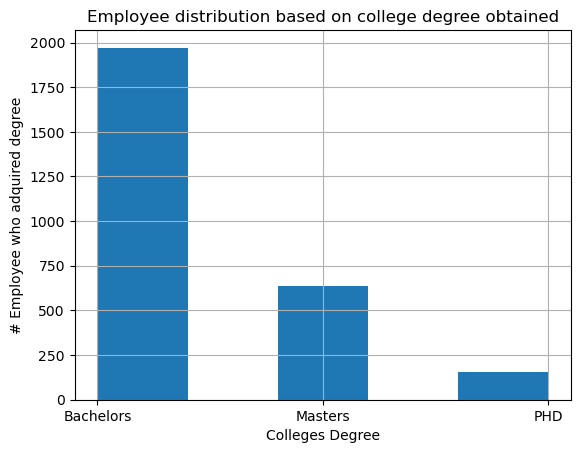

In [15]:
#sns.scatterplot(x = "Experience_year", y = "PaymentTier", hue = "Education", data = df2)
#sns.relplot(x = "Experience_year", y = "PaymentTier", kind = "line",data = df2)
df2["Education"].hist(bins = 5)
plt.xlabel("Colleges Degree")
plt.ylabel("# Employee who adquired degree")
plt.title("Employee distribution based on college degree obtained")

Text(0.5, 1.0, 'Employees based on experience on field')

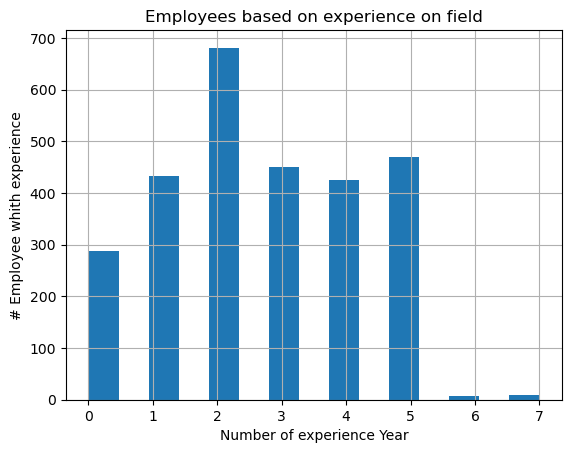

In [16]:
df2["Experience_year"].hist(bins = 15)
plt.xlabel("Number of experience Year")
plt.ylabel("# Employee whith experience")
plt.title("Employees based on experience on field")

Text(0.5, 1.0, 'Proportion of employees divided byu cities')

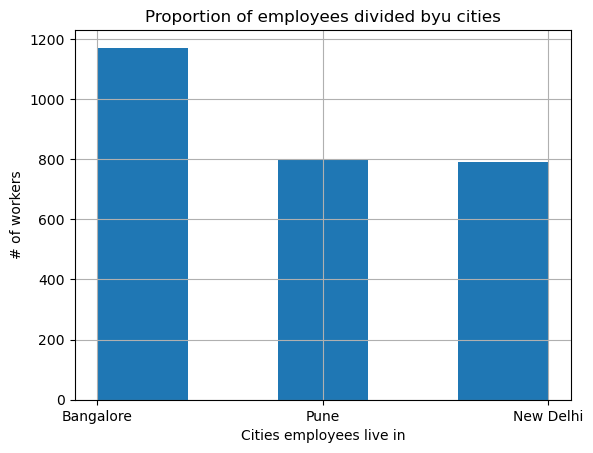

In [19]:
df2["City"].hist(bins = 5)
plt.xlabel("Cities employees live in")
plt.ylabel("# of workers")
plt.title("Proportion of employees divided byu cities")

Text(0.5, 1.0, 'Distribution of employees based on gender')

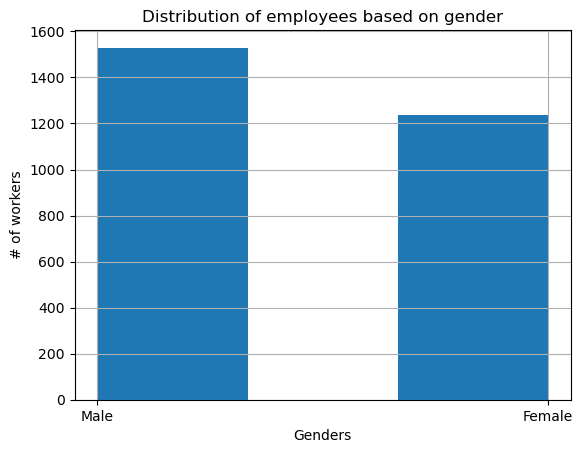

In [21]:
df2["Gender"].hist(bins = 3)
plt.xlabel("Genders")
plt.ylabel("# of workers")
plt.title("Distribution of employees based on gender")

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Education Achieve vs Payment Tier at company')

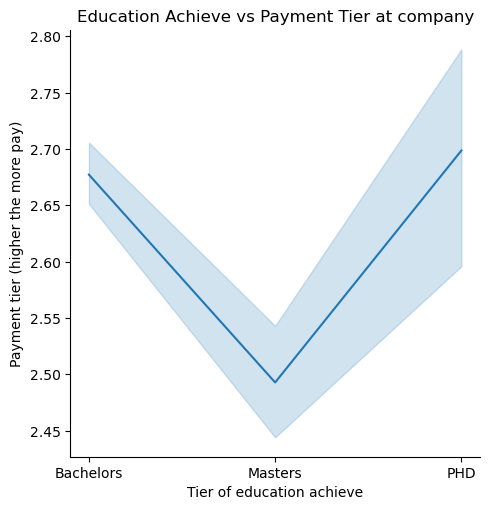

In [23]:
sns.relplot(x = "Education", y = "PaymentTier", kind = "line",data = df2)
plt.xlabel("Tier of education achieve")
plt.ylabel("Payment tier (higher the more pay)")
plt.title("Education Achieve vs Payment Tier at company")

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Education Achieve vs Experience Year in the industry')

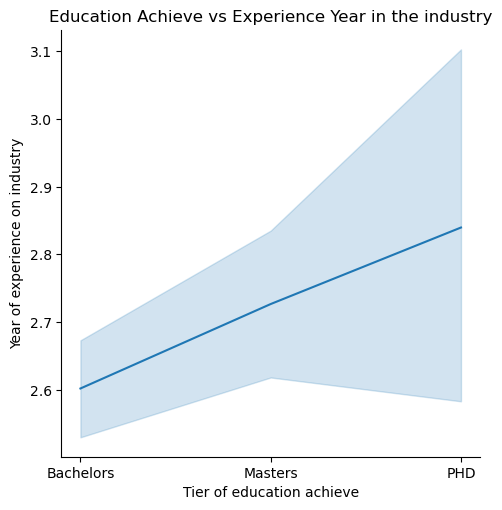

In [25]:
sns.relplot(x = "Education", y = "Experience_year", kind = "line",data = df2)
plt.xlabel("Tier of education achieve")
plt.ylabel("Year of experience on industry")
plt.title("Education Achieve vs Experience Year in the industry")

/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Education Achieve vs Experience Year in the industry')

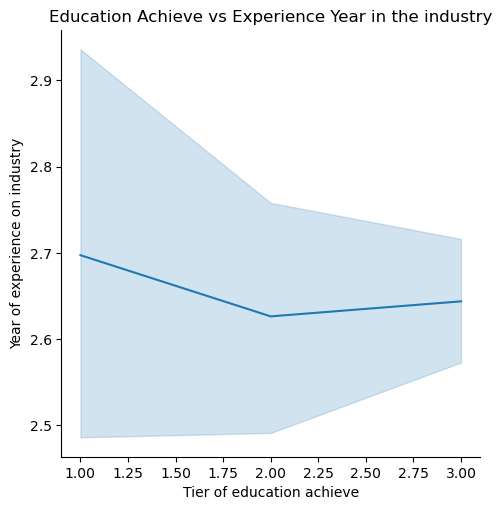

In [27]:
sns.relplot(x = "PaymentTier", y = "Experience_year", kind = "line",data = df2)
plt.xlabel("Tier of education achieve")
plt.ylabel("Year of experience on industry")
plt.title("Education Achieve vs Experience Year in the industry")